In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from datetime import datetime as dt



# EDA of the player data



In [2]:
data = pd.read_csv('../input/epl-stats-20192020/players_1920_fin.csv')

In [3]:
### Addding player performence ratio to value
data['value'] = data['value'] / 10
data['ppm'] = data.apply(lambda row: row.total_points/ 
                                  (row.value), axis = 1) 

#### fixing liverpool double game week
data.loc[(data['team'] == 'Liverpool')&(data['fixture'] == 237), 'round'] = 24.5

data = pd.DataFrame(data)

data = data.astype({'ppm':float})
data['kickoff_time']=pd.to_datetime(data['kickoff_time'])

In [4]:
### quick look at out data
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22502 entries, 0 to 22501
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         22502 non-null  int64         
 1   assists            22502 non-null  int64         
 2   bonus              22502 non-null  int64         
 3   bps                22502 non-null  int64         
 4   clean_sheets       22502 non-null  int64         
 5   creativity         22502 non-null  float64       
 6   element            22502 non-null  int64         
 7   fixture            22502 non-null  int64         
 8   goals_conceded     22502 non-null  int64         
 9   goals_scored       22502 non-null  int64         
 10  ict_index          22502 non-null  float64       
 11  influence          22502 non-null  float64       
 12  kickoff_time       22502 non-null  datetime64[ns]
 13  minutes            22502 non-null  int64         
 14  oppone

Index(['Unnamed: 0', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team', 'ppm'],
      dtype='object')

In [5]:
#### filtering columns for correlation matrix
data_corr = data.iloc[:, np.r_[1:6,8:15,24:26]]
data_corr.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'threat', 'total_points'],
      dtype='object')

# Correlation Matrix

In [6]:
### Correlation Matrix
corr = data_corr.corr()
corr.style.background_gradient(cmap='coolwarm')


,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,threat,total_points
assists,1.000000,0.324291,0.403840,0.148332,0.395324,0.076782,0.110333,0.402683,0.377123,0.211575,0.232713,0.462717
bonus,0.324291,1.000000,0.647447,0.286023,0.299785,0.039995,0.614587,0.537591,0.626008,0.282561,0.374151,0.751237
bps,0.403840,0.647447,1.000000,0.509534,0.531843,0.342761,0.568663,0.778580,0.903025,0.755717,0.468589,0.907330
clean_sheets,0.148332,0.286023,0.509534,1.000000,0.263898,-0.180516,0.141971,0.340588,0.339073,0.440787,0.232717,0.590746
creativity,0.395324,0.299785,0.531843,0.263898,1.000000,0.271229,0.212524,0.762677,0.511965,0.517552,0.432497,0.458176
goals_conceded,0.076782,0.039995,0.342761,-0.180516,0.271229,1.000000,0.087964,0.361333,0.392014,0.623529,0.224969,0.155057
goals_scored,0.110333,0.614587,0.568663,0.141971,0.212524,0.087964,1.000000,0.615691,0.672064,0.219749,0.570487,0.660120
ict_index,0.402683,0.537591,0.778580,0.340588,0.762677,0.361333,0.615691,1.000000,0.843451,0.676487,0.832066,0.754378
influence,0.377123,0.626008,0.903025,0.339073,0.511965,0.392014,0.672064,0.843451,1.000000,0.700319,0.537664,0.830731
minutes,0.211575,0.282561,0.755717,0.440787,0.517552,0.623529,0.219749,0.676487,0.700319,1.000000,0.443399,0.631502


# Scoring, assisting and FPL point leaders over time

In [7]:
#### Goals scored per player 
data['Total scored'] = data.sort_values(by=['round']).groupby(['full'])['goals_scored'].cumsum()
### retreiving the names of the current top 5 scorers and filtering the data to include their obs
top_scorers = data.groupby(['full'])['Total scored'].max().sort_values(ascending=False).head(n=5).index.get_level_values('full').tolist()
top = data.full.isin(top_scorers)
scorers = data[top]

Text(0.5, 1.0, 'Top 5 - Goals')

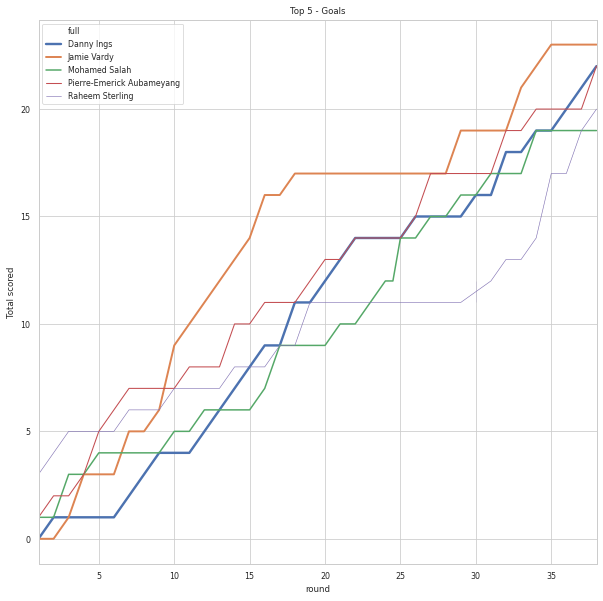

In [8]:
#### ploting the goals scoring progress for each of the top scorers. 
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)
plt.xlim(1,38)
sns.lineplot('round', 'Total scored', data=scorers, hue='full',size = 'full').set_title("Top 5 - Goals")

In [9]:
#### Points scored per player in FPL 
data['Total points'] = data.sort_values(by=['round']).groupby(['full'])['total_points'].cumsum()
### retreiving the names of the current top 5 leaders and filtering the data to include their obs
top_pts = data.groupby(['full'])['Total points'].max().sort_values(ascending=False).head(n=5).index.get_level_values('full').tolist()
top = data.full.isin(top_pts)
top_points = data[top]

Text(0.5, 1.0, 'Top 5 - points')

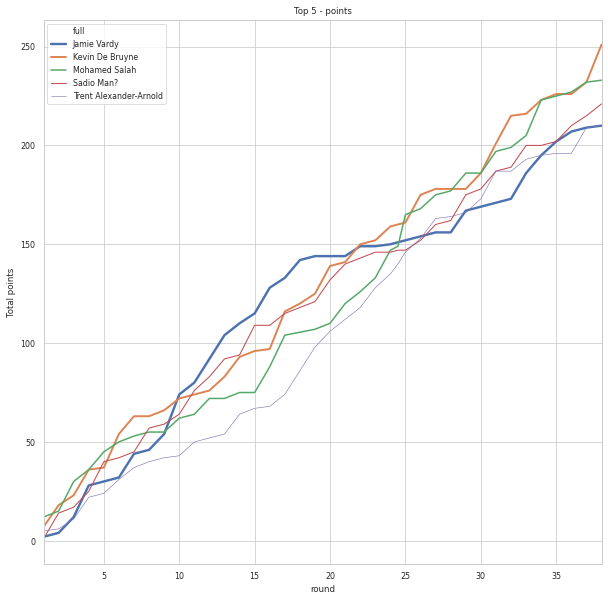

In [10]:
#### Ploting the point scoring progress for each of the leaders. 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(10, 10)) 
plt.xlim(1,38)
sns.lineplot('round', 'Total points', data=top_points, hue='full',size = 'full').set_title("Top 5 - points")



In [11]:
#### Assists per player in FPL 
data['Total assist'] = data.sort_values(by=['round']).groupby(['full'])['assists'].cumsum()
### retreiving the names of the current top 5 leaders and filtering the data to include their obs
top_assist = data.groupby(['full'])['Total assist'].max().sort_values(ascending=False).head(n=5).index.get_level_values('full').tolist()
top = data.full.isin(top_assist)
top_assists = data[top]

Text(0.5, 1.0, 'Top 5 - Assist')

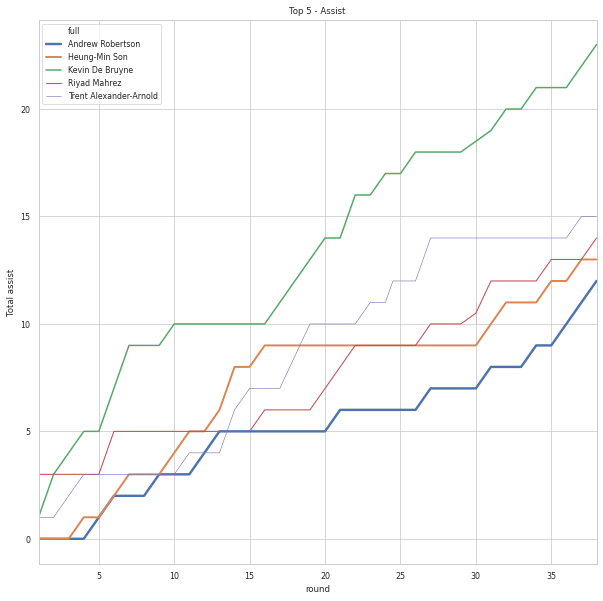

In [12]:
#### Ploting the point scoring progress for each of the leaders. 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(10, 10)) 
plt.xlim(1,38)
sns.lineplot('round', 'Total assist', data=top_assists, hue='full',size = 'full').set_title("Top 5 - Assist")



In [13]:
## Creating a filtered dataframe of players who played a total greater then the median

## Total minutes played for each player
data['Total minutes'] = data.sort_values(by=['round']).groupby(['full'])['minutes'].cumsum()
tot_min = pd.DataFrame(data.groupby(['full'])['Total minutes'].max())

### totals as cumsums
data['total_cleans'] = data.sort_values(by=['round']).groupby(['full'])['clean_sheets'].cumsum()
data['total_saves'] = data.sort_values(by=['round']).groupby(['full'])['saves'].cumsum()
data['total_conceded'] = data.sort_values(by=['round']).groupby(['full'])['goals_conceded'].cumsum()


### filtering players that played above the median
played = tot_min[tot_min['Total minutes']>tot_min['Total minutes'].median()]
played.index.name = 'full'
played.reset_index(inplace=True)
reg_names = played['full'].tolist()

### filtering data to include obs by regular playing players
reg = data.full.isin(reg_names)
regulars = data[reg]
### getting match times
regulars['kickoff_time']= pd.to_datetime(regulars['kickoff_time'])
regulars['day'] = regulars.kickoff_time.dt.weekday
regulars['hour'] = regulars.kickoff_time.dt.hour


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

# Regulars indices summary by team

Regulars are defined as players that played above the median total minutes this season. 

In [14]:
#### producing a table to summarise FPL indices per team (for regular playing players in terms of minutes across all teams)

regulars.groupby(['team']).agg({'ict_index':['mean','median','max'], 
                         'influence':['mean','median','max'], 
                         'creativity':['mean','median','max'], 
                         'threat': ['mean','median','max'],
                         'selected': ['mean','median','max']})



ict_index               influence               creativity  \
                      mean median   max       mean median    max       mean   
team                                                                          
Arsenal           2.434101   1.40  18.6  10.921439    4.6   94.4   6.373381   
Aston Villa       2.674112   1.60  23.6  11.309467    6.6   97.4   7.692456   
Bournemouth       2.456037   1.80  15.1  11.231889    6.3   72.4   5.854799   
Brighton          2.884359   2.10  21.6  12.057903    8.6   70.2   8.095341   
Burnley           2.862030   2.10  19.8  12.960902   10.3   74.2   7.223496   
Chelsea           3.351023   2.00  26.8  12.810234    7.6  117.2   9.675292   
Crystal Palace    2.452941   1.70  16.6  10.758824    8.6   72.6   6.065944   
Everton           2.783282   1.90  24.2  11.333746    7.4   88.0   7.554644   
Leicester         3.518462   2.40  26.2  14.577094   10.4  117.8   9.498803   
Liverpool         4.287594   2.90  24.9  16.234962   11.4   91.4  12.332143   
Man City          4.176039   2.10  30.1  14.253463    7.2  131.0  12.564266   
Man Utd           3.170031   2.10  20.4  12.971254    8.7  103.4   8.953058   
Newcastle United  2.176248   1.40  13.6  10.497126    5.8   65.4   5.398790   
Norwich           2.650000   2.00  23.9  11.951228    8.4  112.4   6.897193   
Sheffield United  3.141929   2.50  17.1  13.469291   11.1   77.8   8.387992   
Southampton       2.969458   2.10  20.5  12.562562    8.6   79.0   7.630870   
Tottenham         2.619452   1.60  25.4  11.835616    6.4   88.0   6.824795   
Watford           2.472601   1.65  23.8  10.554799    6.8   84.4   6.586378   
West Ham          2.895906   1.90  35.8  12.040315    7.8  144.0   7.990394   
Wolves            3.585300   2.50  20.3  14.957834   12.0   84.4   9.699613   

                                   threat                   selected  \
                 median    max       mean median  max           mean   
team                                                                   
Arsenal            0.60   71.3   7.035971      0  106  254437.471942   
Aston Villa        0.80  104.3   7.767751      0  123  161929.939349   
Bournemouth        0.80   86.3   7.495356      0   84  192019.921053   
Brighton           1.60   81.0   8.717138      1  176  167473.525790   
Burnley            1.30   73.3   8.526316      0  111  180707.031955   
Chelsea            1.50  103.8  11.038012      0  110  369385.277778   
Crystal Palace     0.80  101.3   7.698142      0  103  256291.043344   
Everton            1.10   71.6   8.967492      0  107  229090.671827   
Leicester          2.00  110.8  11.112821      2  145  545614.905983   
Liverpool          4.55  102.6  14.304511      2  133  995699.233083   
Man City           2.30  133.5  14.944598      1  151  615130.331025   
Man Utd            2.25   88.1   9.772171      1  118  481528.084098   
Newcastle United   0.20   55.6   5.857791      0   80   82336.478064   
Norwich            1.00  114.1   7.652632      0  114  220737.673684   
Sheffield United   2.65   64.3   9.596457      2  152  363607.625984   
Southampton        1.10   58.8   9.497537      0  116  149454.364532   
Tottenham          0.70   53.2   7.532877      0  140  248662.746575   
Watford            0.40   92.0   7.586687      0  117   68228.393189   
West Ham           1.50   99.4   8.922835      0  181  100721.803150   
Wolves             3.20   76.2  11.191489      2  116  433601.197292   

                                     
                    median      max  
team                                 
Arsenal           106371.0  2209579  
Aston Villa        68808.5  2035690  
Bournemouth        31232.0  1189451  
Brighton           39372.0  1354628  
Burnley            59528.0  1799888  
Chelsea           174835.0  3555229  
Crystal Palace     70820.5  2369485  
Everton            84403.5  2021685  
Leicester         311670.0  3757751  
Liverpool         418034.0  3401581  
Man City          210694.0  3983614  
Man Utd   

Text(0.5, 1.0, 'Influence dist')

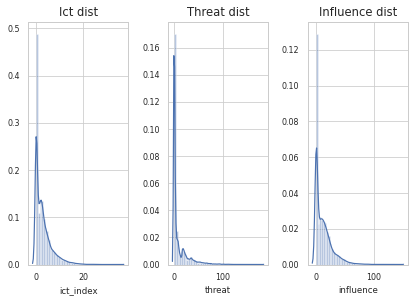

<Figure size 360x720 with 0 Axes>

In [15]:
#### indices disturbutions
fig, ax =plt.subplots(1,3 )
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(5, 10))
fig.tight_layout()
sns.distplot(regulars['ict_index'],ax=ax[0]).set_title("Ict dist")
sns.distplot(regulars['threat'],ax=ax[1]).set_title("Threat dist")
sns.distplot(regulars['influence'],ax=ax[2]).set_title("Influence dist")


Text(0.5, 1.0, 'Creativity dist')

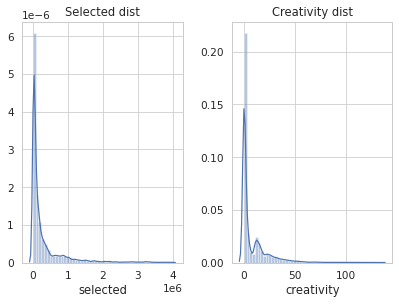

<Figure size 360x720 with 0 Axes>

In [16]:
fig, ax =plt.subplots(1,2 )
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(5, 10))
fig.tight_layout()
sns.distplot(regulars['selected'],ax=ax[0]).set_title("Selected dist")
sns.distplot(regulars['creativity'],ax=ax[1]).set_title("Creativity dist")


# Man City and Liverpool
An interesting point that arises, is that Man City seem to perform better in terms of induvidual stats measured by FPL. These results are for players that play a substantial amount of the time. So, did liverpool get ahead thanks to unseen factors? luck? 
Another option is that Liverpool's less regular players provided more then Man City's. 

In [17]:
nonreg = data[-reg]
nonreglc = nonreg[(nonreg['team']=='Liverpool')|(nonreg['team']=='Man City')]
livcity = data[(data['team']=='Liverpool')|(data['team']=='Man City')]

Text(0.5, 1.0, 'Threat boxes')

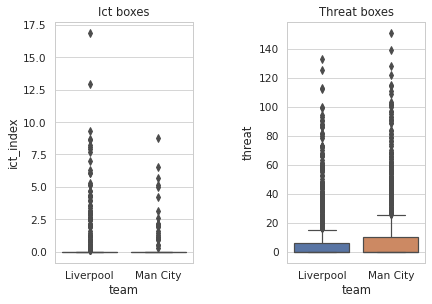

<Figure size 1440x1080 with 0 Axes>

In [18]:
fig, ax =plt.subplots(1,2 )
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(20, 15))
fig.tight_layout(w_pad = 5)
 
sns.boxplot('team', 'ict_index', data=nonreglc,ax=ax[0]).set_title("Ict boxes")
sns.boxplot('team', 'threat', data=livcity,ax=ax[1]).set_title("Threat boxes")


Text(0.5, 1.0, 'Influence boxes')

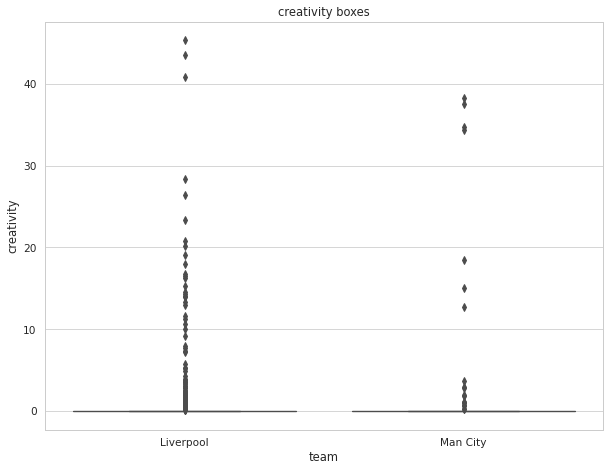

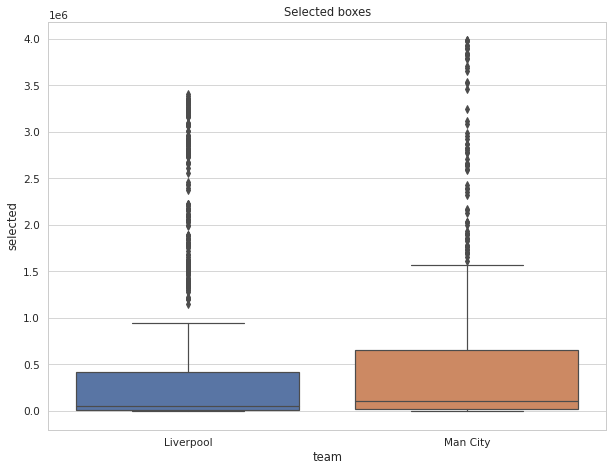

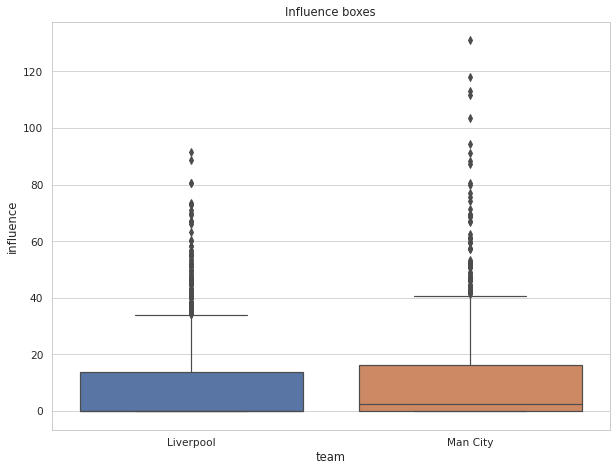

In [19]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(10, 7.5)) 
sns.boxplot('team', 'creativity', data=nonreglc).set_title("creativity boxes")

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(10, 7.5)) 
sns.boxplot('team', 'selected', data=livcity).set_title("Selected boxes")


sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(10, 7.5)) 
sns.boxplot('team', 'influence', data=livcity).set_title("Influence boxes")


It seems Liverpool's less regular players do manage to cut the gap, yet Man City induvidual indices are still superior in most cases. 

# Best player in FPL

We can measure efficiency by the ratio point/value.
Let's see the players with the best mean ratio throughout the season. 

In [20]:
best_value = data.groupby(['full'])['ppm'].mean().sort_values(ascending=False).head(n=20)
best_value = pd.DataFrame(best_value)
best_value.index.name = 'full'
best_value.reset_index(inplace=True)

val_names = best_value['full'].tolist()

### filtering data to include obs by regular playing players
val = data.full.isin(val_names)
best = data[val]

best_value

,full,ppm
0,Luke Thomas,12.500000
1,Bruno Miguel Borges Fernandes,9.721131
2,Nick Pope,9.458008
3,Dean Henderson,8.676905
4,John Lundstram,8.138086
5,Danny Ings,7.960232
6,George Baldock,7.837129
7,Kasper Schmeichel,7.813952
8,Rui Pedro dos Santos Patr?cio,7.812121
9,John Egan,7.748700


Text(0.5, 1.0, 'Top 20 - points')

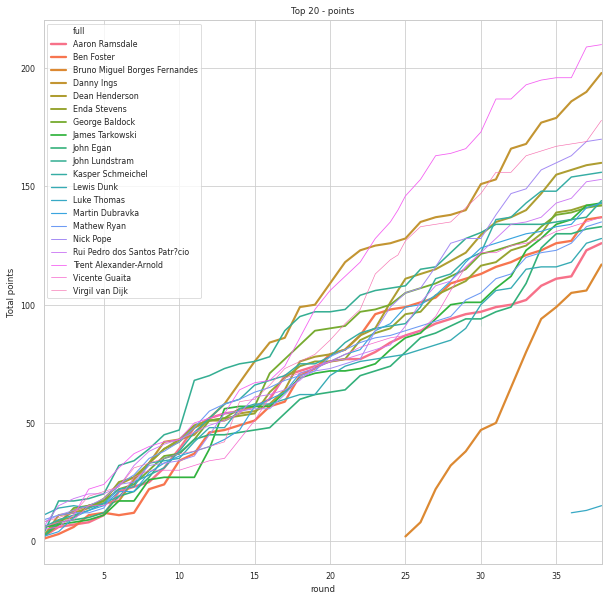

In [21]:
#### ploting the point scoring progress for each of the leaders. 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(10, 10)) 
plt.xlim(1,38)
sns.lineplot('round', 'Total points', data=best, hue='full',size = 'full').set_title("Top 20 - points")


In [22]:
 best.groupby(['full']).agg({'ict_index':['mean','median','max'], 
                         'influence':['mean','median','max'], 
                         'creativity':['mean','median','max'], 
                         'threat': ['mean','median','max'],
                         'selected': ['mean','median','max'],
                         'ppm': ['mean','median','max']})



ict_index               influence               \
                                   mean median   max       mean median   max   
full                                                                           
Aaron Ramsdale                 2.623684   2.65   6.6  25.626316   26.7  64.8   
Ben Foster                     2.460526   2.25   7.8  23.805263   22.5  60.8   
Bruno Miguel Borges Fernandes  9.942857   8.65  18.9  39.414286   31.3  83.6   
Danny Ings                     7.957895   6.90  20.5  26.578947   30.3  79.0   
Dean Henderson                 1.968421   1.75   5.9  18.915789   17.1  54.0   
Enda Stevens                   4.039474   4.25   7.5  16.868421   15.0  42.8   
George Baldock                 3.384211   2.90   9.6  14.731579   12.5  59.0   
James Tarkowski                3.944737   3.45  14.8  24.205263   22.0  58.4   
John Egan                      3.300000   2.35  16.9  16.878947   16.8  43.6   
John Lundstram                 3.523684   2.50  17.1  13.231579    8.9  77.8   
Kasper Schmeichel              2.357895   2.00   7.3  22.721053   18.3  73.0   
Lewis Dunk                     3.863158   2.95  10.9  21.726316   19.0  52.0   
Luke Thomas                    7.966667   7.90   8.2  26.133333   22.0  36.4   
Martin Dubravka                2.684211   2.35   6.0  26.815789   23.2  60.2   
Mathew Ryan                    2.634211   2.35   6.5  26.315789   23.1  64.8   
Nick Pope                      2.450000   2.55   7.4  23.684211   25.5  74.2   
Rui Pedro dos Santos Patr?cio  1.955263   1.90   4.3  19.500000   18.7  43.2   
Trent Alexander-Arnold         7.442105   6.50  17.5  27.021053   24.2  88.8   
Vicente Guaita                 2.173684   2.25   5.8  21.768421   22.6  58.2   
Virgil van Dijk                4.073684   3.20  12.0  24.478947   20.8  80.6   

                              creativity                   threat              \
                                    mean median    max       mean median  max   
full                                                                            
Aaron Ramsdale                  0.631579   0.00   10.0   0.000000    0.0    0   
Ben Foster                      0.265789   0.00   10.0   0.447368    0.0   17   
Bruno Miguel Borges Fernandes  34.235714  30.40   75.5  25.785714   25.5   57   
Danny Ings                     12.060526  10.95   51.8  41.000000   33.0  116   
Dean Henderson                  0.263158   0.00   10.0   0.473684    0.0   18   
Enda Stevens                   14.592105  13.05   47.4   8.894737    6.0   25   
George Baldock                 12.781579  10.10   47.2   6.342105    4.0   31   
James Tarkowski                 4.397368   0.50   11.8  10.789474    5.0   90   
John Egan                       0.668421   0.30   10.2  15.447368    4.0  152   
John Lundstram                 10.076316   7.55   31.1  11.815789    3.5   77   
Kasper Schmeichel               0.789474   0.00   10.0   0.052632    0.0    2   
Lewis Dunk                      4.521053   0.90   13.3  12.342105    5.5   81   
Luke Thomas                    49.933333  52.90   57.8   3.333333    2.0    6   
Martin Dubravka                 0.000000   0.00    0.0   0.000000    0.0    0   
Mathew Ryan                     0.000000   0.00    0.0   0.000000    0.0    0   
Nick Pope                       0.797368   0.00   10.3   0.052632    0.0    2   
Rui Pedro dos Santos Patr?cio   0.000000   0.00    0.0   0.000000    0.0    0   
Trent Alexander-Arnold         36.323684  31.40  102.6  11.052632    7.5   56   
Vicente Guaita                  0.000000   0.00    0.0   0.000000    0.0    0   
Virgil van Dijk                 4.010526   1.55   32.1  12.289474    3.0   56   

                                   selected                            ppm  \
                                       mean     median      max       mean   
full                                                                         
Aaron Ramsdale                 2.289776e+05   262981.5   448315   7.304097   
Ben Foster   

# Predicting performence 

I'll create form variables of FPL indices and more in order to predict the next performence of EPL players. 

In [23]:
#### creating form variables
### We get the means of indices for the last 2 games and 4 games
forms = ['total_points','assists','goals_scored','ict_index','threat','creativity','influence','saves','value','minutes','goals_conceded','clean_sheets','ppm']
form2_means = regulars.groupby(['full'])[forms].rolling(2).mean().reset_index()
form4_means = regulars.groupby(['full'])[forms].rolling(4).mean().reset_index()

### adding forms to regulars DF, dropping NA's will result in loosing the first 4 obs for each player. Hence this model is relevant in predicting from the 5th. 
result = pd.merge(form2_means, form4_means, how='left', on=['full', 'level_1'],suffixes=('_2','_4'))
final = pd.merge(regulars,result,how='inner',left_index=True,right_on='level_1')
final_na = final.dropna()

In [24]:
#### creating Y and X datasets
y = final_na.loc[:,['total_points']]

X = final_na.drop(['total_points'], axis=1)
X = X.iloc[:,14:]
X = X.drop(X.columns.to_series()["own_goals":"was_home"], axis=1)
X = X.drop(['yellow_cards','level_1','full_y','ppm'],axis=1)

for col in ['opponent_team', 'full_x', 'team']:
    X[col] = X[col].astype('category')


In [25]:
#### these are the features used to predict total points for each player
X.columns

Index(['opponent_team', 'full_x', 'team', 'Total scored', 'Total points',
       'Total assist', 'Total minutes', 'total_cleans', 'total_saves',
       'total_conceded', 'day', 'hour', 'total_points_2', 'assists_2',
       'goals_scored_2', 'ict_index_2', 'threat_2', 'creativity_2',
       'influence_2', 'saves_2', 'value_2', 'minutes_2', 'goals_conceded_2',
       'clean_sheets_2', 'ppm_2', 'total_points_4', 'assists_4',
       'goals_scored_4', 'ict_index_4', 'threat_4', 'creativity_4',
       'influence_4', 'saves_4', 'value_4', 'minutes_4', 'goals_conceded_4',
       'clean_sheets_4', 'ppm_4'],
      dtype='object')

In [26]:
#### encoding catagorical data 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:,0] = labelencoder_X.fit_transform(X.iloc[:,0])
X.iloc[:,1] = labelencoder_X.fit_transform(X.iloc[:,1])
X.iloc[:,2] = labelencoder_X.fit_transform(X.iloc[:,2])

### scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## spliting to train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
#### Fitting SVR, the parameters are a result of tuning not shown here due to CPU 
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear',verbose=True,degree=3,C=10,gamma=10,epsilon=0.05)
regressor.fit(X_train, y_train.ravel())


[LibSVM]

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=10,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [28]:
from sklearn import metrics as met
pred = regressor.predict(X_test)


mae=met.mean_absolute_error(y_test, pred)
mse=met.mean_squared_error(y_test, pred)
r2=met.r2_score(y_test, pred)

print ("MAE: {}".format(mae))
print ("MSE: {}".format(mse))
print ("R2: {}".format(r2))


MAE: 0.38080454650840395
MSE: 0.3879701626304754
R2: 0.5952241158645155


In [29]:
#### Finally we can inverse the scale to get the actual predicted points
sc_y.inverse_transform(pred)
 

array([0.70035313, 4.08107585, 4.18871601, ..., 0.40579483, 1.45684223,
       4.67688547])

Players performances are well estimated based on the data we have, we can add more features to increase the accuracy